SRAG 2021 e 2022 - Severe Acute Respiratory Syndrome Database

Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.feature_selection import chi2
import scipy.stats as stats
import seaborn as sn


Datasets

In [2]:
df_original = pd.read_csv('df_preprocessed.csv', delimiter=',')

In [44]:
df = df_original.copy(deep = True)
df.drop(columns=['Unnamed: 0'], inplace= True)

CONSTANTS

In [45]:
FAIXA_ETARIA = ['0-19', '20-24', '25-29', '30-34', '35-39', '40+']

FAIXA_RACA = ['White','Black','Others']
DIC_RACA = {1: 'White', 2: 'Black', 3: 'Others', 4: 'Others', 5: 'Others', 9: 'Ignored'}

FAIXA_ESCOLARIDADE = ['None or Primary incomplete', 'Primary', 'Secondary','College or more']
DIC_ESCOLARIDADE = {0: 'None or Primary incomplete', 1: 'None or Primary incomplete', 2: 'Primary', 3: 'Secondary', 4: 'College or more', 5: 'Ignored', 9: 'Ignored'}

FAIXA_GRAVIDEZ = ['First trimester','Second trimester','Third trimester','Gestation period ignored', 'Puerpera']
DICT_GRAVIDEZ = {1: 'First trimester', 2: 'Second trimester',3: 'Third trimester', 4: 'Gestation period ignored', 5 : 'Puerpera'}

DICT_VACINA = {1: 'at least 1 dose', 2: 'Unvaccinated', 9: 'Ignored'}
FAIXA_VACINA = ['at least 1 dose','Unvaccinated']

FAIXA_REGIAO = ['North','Northeast','Southeast','South','Midwest']

DICT_PADRAO = {1: 'Yes', 2: 'Not', 9: 'Ignored'}
FAIXA_PADRAO = ['Yes','Not']

Mapping dictionaries

In [46]:
df['CS_RACA'] = df['CS_RACA'].map(DIC_RACA)
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(DIC_ESCOLARIDADE)
df['GRAVIDEZ'] = df['GRAVIDEZ'].map(DICT_GRAVIDEZ)
df['VACINA_COV'] = df['VACINA_COV'].map(DICT_VACINA)

df['CARDIOPATI'] = df['CARDIOPATI'].map(DICT_PADRAO)
df['RENAL'] = df['RENAL'].map(DICT_PADRAO)
df['ASMA'] = df['ASMA'].map(DICT_PADRAO)
df['DIABETES'] = df['DIABETES'].map(DICT_PADRAO)

**Table 1: Sociodemographic and obstetrical characteristics of women with  laboratory confirmed SARS-CoV-2 infection.**

Relationship between covid variant and age

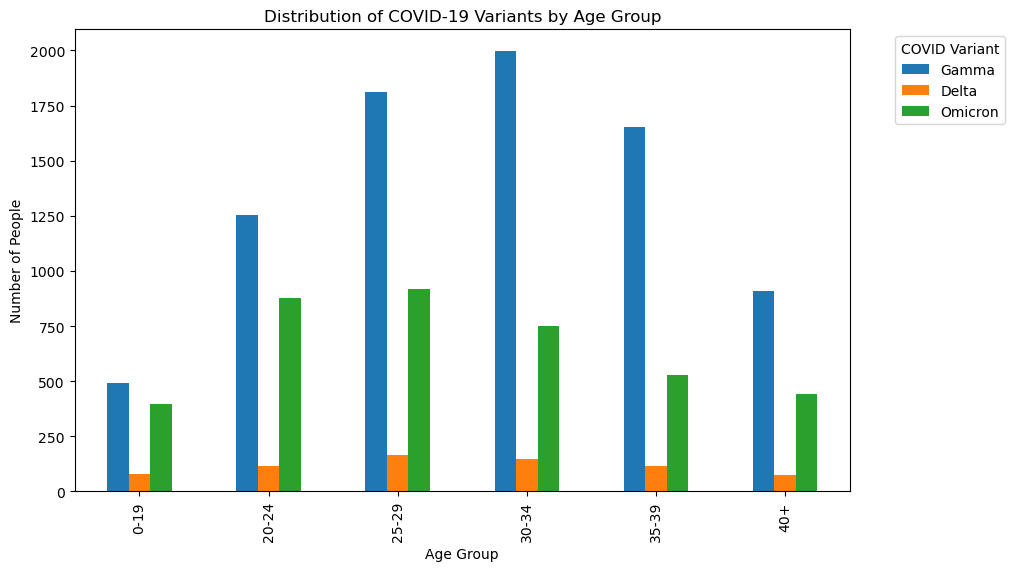

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
0-19,491,6.05%,78,11.22%,398,10.18%,967
20-24,1255,15.46%,117,16.83%,876,22.41%,2248
25-29,1810,22.3%,166,23.88%,918,23.48%,2894
30-34,1996,24.59%,147,21.15%,751,19.21%,2894
35-39,1653,20.37%,115,16.55%,526,13.46%,2294
40+,911,11.22%,72,10.36%,440,11.26%,1423
Total,8116,100.0%,695,100.0%,3909,100.0%,12720


H₀: The two categorical variables have no relationship
p-value : 0.0

Null Hypothesis is rejected.


In [35]:
# Create age groups
bins = [0, 19, 24, 29, 34, 39, float('inf')]

# Add an 'Age_Group' column to the DataFrame
df['Age_Group'] = pd.cut(df['NU_IDADE_N'], bins=bins, labels= FAIXA_ETARIA, right=True)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(index=FAIXA_ETARIA)

# Count the number of people for each variant in each age group
for variant in df['VARIANTE_COVID'].unique():
    variant_counts = df[df['VARIANTE_COVID'] == variant].groupby('Age_Group').size()
    plot_df[variant] = variant_counts

plot_df.rename(columns={1: 'Gamma', 2: 'Delta', 3: 'Omicron'}, inplace=True)

# Plot the grouped bar chart
plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Variants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Add 'Total' column
plot_df['Total'] = plot_df.sum(axis=1)

# Add 'Total' row
plot_df.loc['Total'] = plot_df.sum()

percentage_df = plot_df.copy()
# Add percentage columns
for variant in ['Gamma', 'Delta', 'Omicron']:
    percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
percentage_df = percentage_df[column_order]
display(percentage_df)

#calculation of p-value : What is the evidence of a correlation between age (in general) and the type of covid variant?

alpha = 0.05
chi_square = 0
columns = plot_df.iloc[:,0:3].columns
rows = plot_df.iloc[0:3].index
for i in columns:
  for j in rows:
    O = plot_df[i][j] #observed value
    E = plot_df[i]['Total'] *plot_df['Total'][j] / plot_df['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E


p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

Relationship between covid variant and race/color

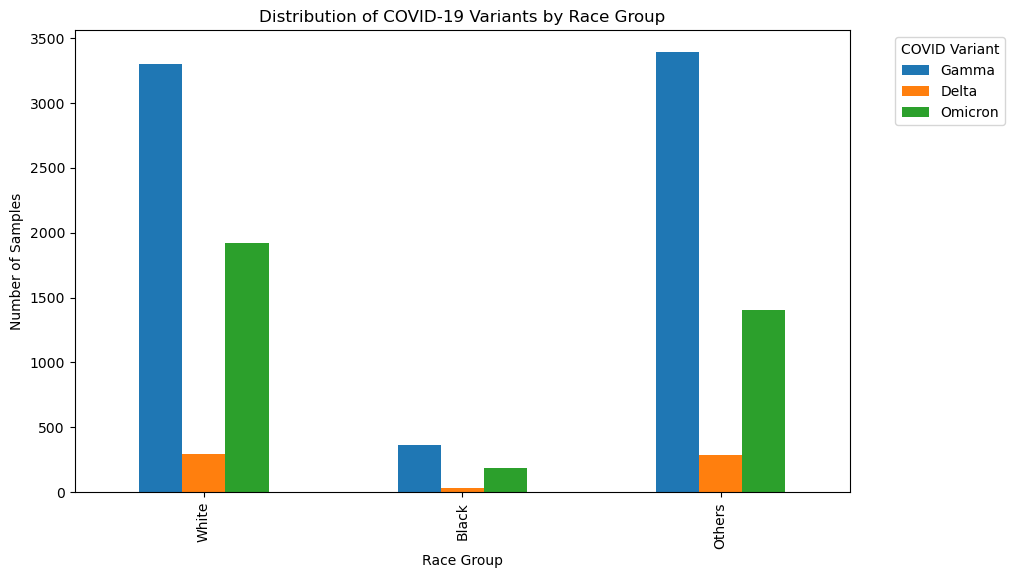

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
White,3297,46.75%,292,47.48%,1918,54.74%,5507
Black,364,5.16%,35,5.69%,185,5.28%,584
Others,3391,48.09%,288,46.83%,1401,39.98%,5080
Total,7052,100.0%,615,100.0%,3504,100.0%,11171


H₀: The two categorical variables have no relationship
p-value : 2.452482661396971e-13

Null Hypothesis is rejected.


In [36]:
# Create age groups
labels = FAIXA_RACA

# Create a DataFrame for plotting
plot_df = pd.DataFrame(index=labels)

# Count the number of people for each variant in each race group
for variant in df['VARIANTE_COVID'].unique():
    variant_counts = df[df['VARIANTE_COVID'] == variant].loc[df['CS_RACA'] != 'Ignored'].groupby('CS_RACA').size()
    plot_df[variant] = variant_counts

plot_df.rename(columns={1: 'Gamma', 2: 'Delta', 3: 'Omicron'}, inplace=True)

# Plot the grouped bar chart
plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Variants by Race Group')
plt.xlabel('Race Group')
plt.ylabel('Number of Samples')
plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Add 'Total' column
plot_df['Total'] = plot_df.sum(axis=1)

# Add 'Total' row
plot_df.loc['Total'] = plot_df.sum()

percentage_df = plot_df.copy()
# Add percentage columns
for variant in ['Gamma', 'Delta', 'Omicron']:
    percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
percentage_df = percentage_df[column_order]
display(percentage_df)

#calculation of p-value : What is the evidence of a correlation between age (in general) and the type of covid variant?

alpha = 0.05
chi_square = 0
columns = plot_df.iloc[:,0:3].columns
rows = plot_df.iloc[0:3].index
for i in columns:
  for j in rows:
    O = plot_df[i][j] #observed value
    E = plot_df[i]['Total'] *plot_df['Total'][j] / plot_df['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E


p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

Relationship between the covid variant and schooling

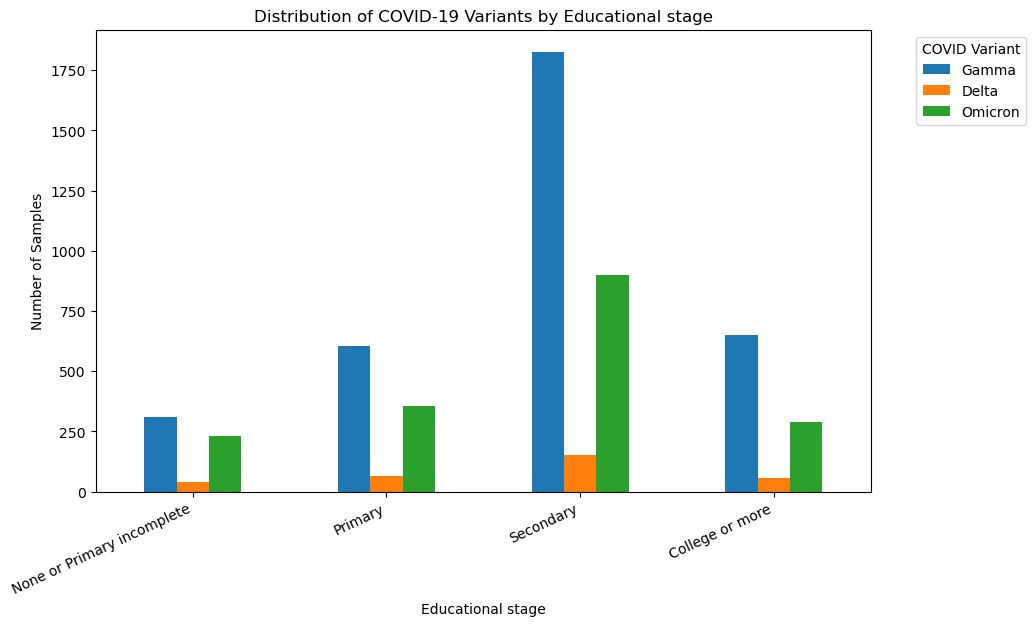

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
None or Primary incomplete,311,9.16%,41,13.23%,229,12.93%,581
Primary,605,17.82%,63,20.32%,354,19.99%,1022
Secondary,1827,53.81%,151,48.71%,899,50.76%,2877
College or more,652,19.2%,55,17.74%,289,16.32%,996
Total,3395,100.0%,310,100.0%,1771,100.0%,5476


H₀: The two categorical variables have no relationship
p-value : 7.599431288241032e-05

Null Hypothesis is rejected.


In [37]:
# Create age groups
labels = FAIXA_ESCOLARIDADE

# Create a DataFrame for plotting
plot_df = pd.DataFrame(index=labels)

# Count the number of people for each variant in each Educational stage
for variant in df['VARIANTE_COVID'].unique():
    variant_counts = df[df['VARIANTE_COVID'] == variant].loc[df['CS_ESCOL_N'] != 'Ignored'].groupby('CS_ESCOL_N').size()
    plot_df[variant] = variant_counts

plot_df.rename(columns={1: 'Gamma', 2: 'Delta', 3: 'Omicron'}, inplace=True)

# Plot the grouped bar chart
ax = plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Variants by Educational stage')
plt.xlabel('Educational stage')
plt.ylabel('Number of Samples')
plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.show()

# Add 'Total' column
plot_df['Total'] = plot_df.sum(axis=1)

# Add 'Total' row
plot_df.loc['Total'] = plot_df.sum()

percentage_df = plot_df.copy()
# Add percentage columns
for variant in ['Gamma', 'Delta', 'Omicron']:
    percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
percentage_df = percentage_df[column_order]
display(percentage_df)

#calculation of p-value : What is the evidence of a correlation between age (in general) and the type of covid variant?

alpha = 0.05
chi_square = 0
columns = plot_df.iloc[:,0:3].columns
rows = plot_df.iloc[0:3].index
for i in columns:
  for j in rows:
    O = plot_df[i][j] #observed value
    E = plot_df[i]['Total'] *plot_df['Total'][j] / plot_df['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E


p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

Analysis of pregnant and postpartum women

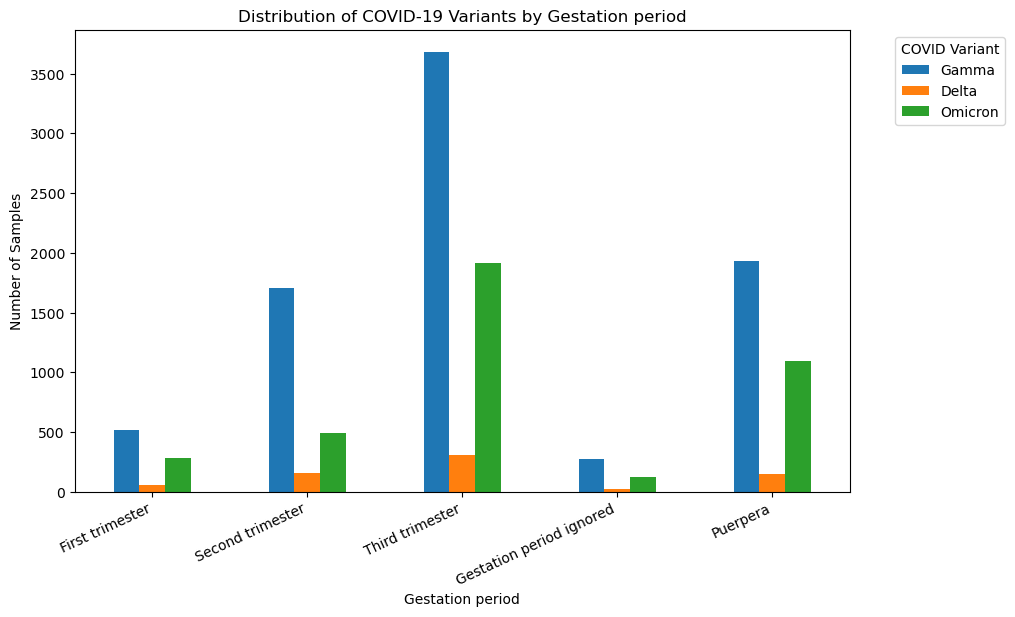

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
First trimester,520,6.41%,55,7.91%,286,7.32%,861
Second trimester,1709,21.05%,162,23.31%,490,12.54%,2361
Third trimester,3682,45.36%,307,44.17%,1912,48.91%,5901
Gestation period ignored,273,3.36%,20,2.88%,128,3.27%,421
Puerpera,1933,23.81%,151,21.73%,1093,27.96%,3177
Total,8117,100.0%,695,100.0%,3909,100.0%,12721


H₀: The two categorical variables have no relationship
p-value : 0.0

Null Hypothesis is rejected.


In [38]:
labels = FAIXA_GRAVIDEZ

# Create a DataFrame for plotting
plot_df = pd.DataFrame(index=labels)

# Count the number of people for each variant in each Gestation period
for variant in df['VARIANTE_COVID'].unique():
    variant_counts = df[df['VARIANTE_COVID'] == variant].groupby('GRAVIDEZ').size()
    plot_df[variant] = variant_counts

plot_df.rename(columns={1: 'Gamma', 2: 'Delta', 3: 'Omicron'}, inplace=True)

# Plot the grouped bar chart
ax = plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Variants by Gestation period')
plt.xlabel('Gestation period')
plt.ylabel('Number of Samples')
plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.show()

# Add 'Total' column
plot_df['Total'] = plot_df.sum(axis=1)

# Add 'Total' row
plot_df.loc['Total'] = plot_df.sum()

percentage_df = plot_df.copy()
# Add percentage columns
for variant in ['Gamma', 'Delta', 'Omicron']:
    percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
percentage_df = percentage_df[column_order]
display(percentage_df)

#calculation of p-value : What is the evidence of a correlation between age (in general) and the type of covid variant?

alpha = 0.05
chi_square = 0
columns = plot_df.iloc[:,0:3].columns
rows = plot_df.iloc[0:3].index
for i in columns:
  for j in rows:
    O = plot_df[i][j] #observed value
    E = plot_df[i]['Total'] *plot_df['Total'][j] / plot_df['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E


p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

Relationship between the covid variant and the vaccine

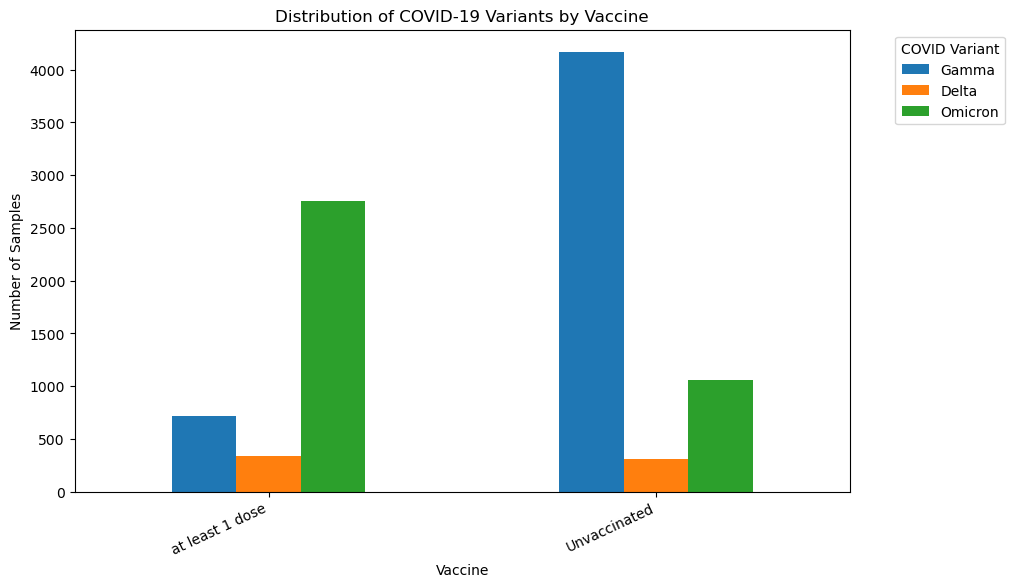

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
at least 1 dose,713,14.6%,337,52.25%,2750,72.22%,3800
Unvaccinated,4170,85.4%,308,47.75%,1058,27.78%,5536
Total,4883,100.0%,645,100.0%,3808,100.0%,9336


H₀: The two categorical variables have no relationship
p-value : 0.0

Null Hypothesis is rejected.


In [39]:
labels = FAIXA_VACINA

# Create a DataFrame for plotting
plot_df = pd.DataFrame(index=labels)

# Count the number of people for each variant to Vaccine
for variant in df['VARIANTE_COVID'].unique():
    variant_counts = df[df['VARIANTE_COVID'] == variant].loc[df['VACINA_COV'] != 'Ignored'].groupby('VACINA_COV').size()
    plot_df[variant] = variant_counts

plot_df.rename(columns={1: 'Gamma', 2: 'Delta', 3: 'Omicron'}, inplace=True)

# Plot the grouped bar chart
ax = plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Variants by Vaccine')
plt.xlabel('Vaccine')
plt.ylabel('Number of Samples')
plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.show()

# Add 'Total' column
plot_df['Total'] = plot_df.sum(axis=1)

# Add 'Total' row
plot_df.loc['Total'] = plot_df.sum()

percentage_df = plot_df.copy()
# Add percentage columns
for variant in ['Gamma', 'Delta', 'Omicron']:
    percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
percentage_df = percentage_df[column_order]
display(percentage_df)

#calculation of p-value : What is the evidence of a correlation between age (in general) and the type of covid variant?

alpha = 0.05
chi_square = 0
columns = plot_df.iloc[:,0:3].columns
rows = plot_df.iloc[0:3].index
for i in columns:
  for j in rows:
    O = plot_df[i][j] #observed value
    E = plot_df[i]['Total'] *plot_df['Total'][j] / plot_df['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E


p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

relationship between region and covid variant

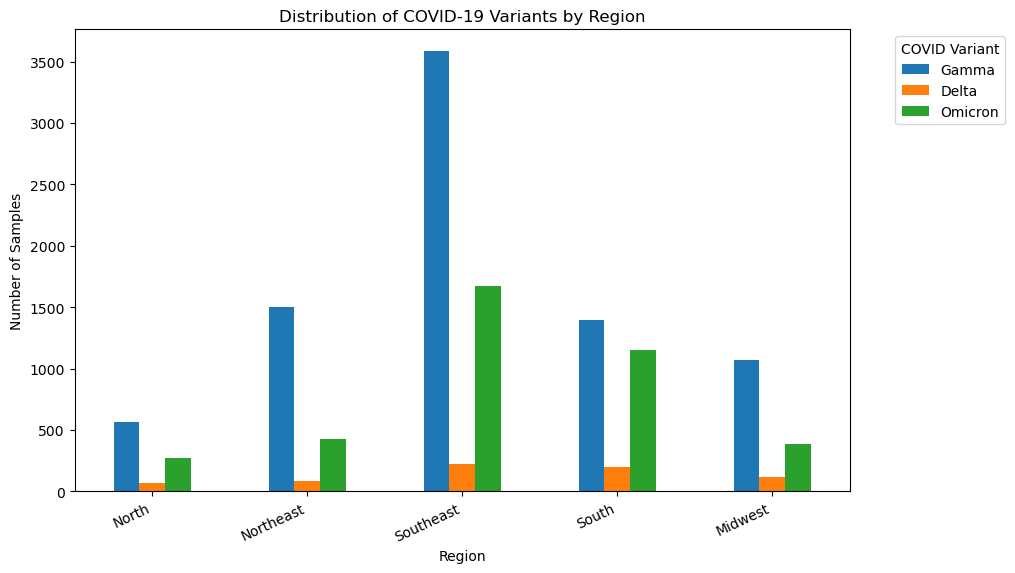

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
North,568,7.0%,69,9.93%,269,6.88%,906
Northeast,1500,18.48%,88,12.66%,426,10.9%,2014
Southeast,3582,44.13%,221,31.8%,1675,42.85%,5478
South,1394,17.17%,197,28.35%,1154,29.52%,2745
Midwest,1073,13.22%,120,17.27%,385,9.85%,1578
Total,8117,100.0%,695,100.0%,3909,100.0%,12721


H₀: The two categorical variables have no relationship
p-value : 0.0

Null Hypothesis is rejected.


In [41]:
labels = FAIXA_REGIAO

# Create a DataFrame for plotting
plot_df = pd.DataFrame(index=labels)

# Count the number of people for each variant by region
for variant in df['VARIANTE_COVID'].unique():
    variant_counts = df[df['VARIANTE_COVID'] == variant].groupby('Regiao_nome').size()
    plot_df[variant] = variant_counts

plot_df.rename(columns={1: 'Gamma', 2: 'Delta', 3: 'Omicron'}, inplace=True)

# Plot the grouped bar chart
ax = plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Variants by Region')
plt.xlabel('Region')
plt.ylabel('Number of Samples')
plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.show()

# Add 'Total' column
plot_df['Total'] = plot_df.sum(axis=1)

# Add 'Total' row
plot_df.loc['Total'] = plot_df.sum()

percentage_df = plot_df.copy()
# Add percentage columns
for variant in ['Gamma', 'Delta', 'Omicron']:
    percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
percentage_df = percentage_df[column_order]
display(percentage_df)

#calculation of p-value : What is the evidence of a correlation between age (in general) and the type of covid variant?

alpha = 0.05
chi_square = 0
columns = plot_df.iloc[:,0:3].columns
rows = plot_df.iloc[0:3].index
for i in columns:
  for j in rows:
    O = plot_df[i][j] #observed value
    E = plot_df[i]['Total'] *plot_df['Total'][j] / plot_df['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E


p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

relationship between chronic cardiovascular disease and covid variant

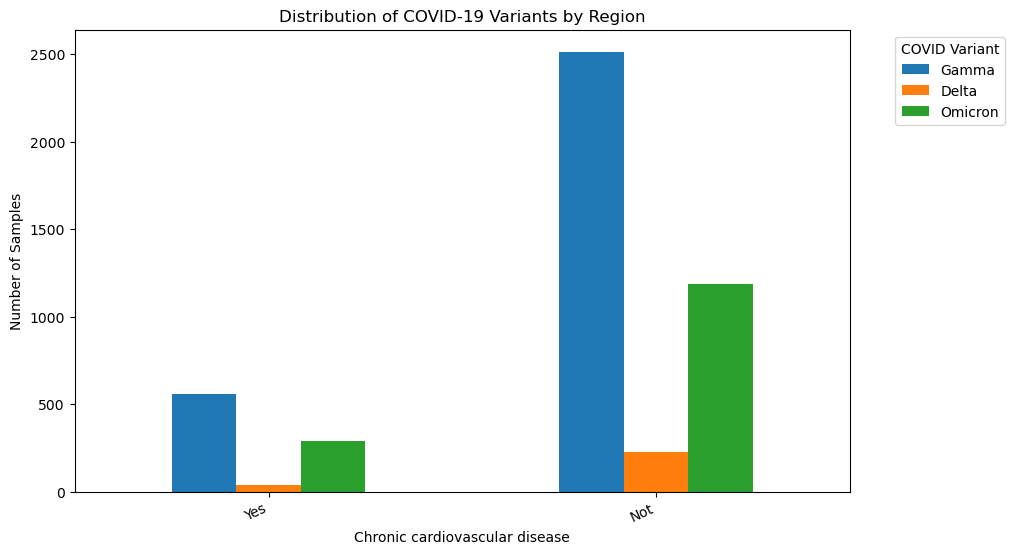

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,559,18.18%,38,14.39%,289,19.61%,886
Not,2515,81.82%,226,85.61%,1185,80.39%,3926
Total,3074,100.0%,264,100.0%,1474,100.0%,4812


H₀: The two categorical variables have no relationship
p-value : 0.3615710229687905

Failed to reject the null hypothesis.


In [42]:
labels = FAIXA_PADRAO

# Create a DataFrame for plotting
plot_df = pd.DataFrame(index=labels)

# Count the number of people for each variant by Chronic cardiovascular disease
for variant in df['VARIANTE_COVID'].unique():
    variant_counts = df[df['VARIANTE_COVID'] == variant].loc[df['CARDIOPATI'] != 'Ignored'].groupby('CARDIOPATI').size()
    plot_df[variant] = variant_counts

plot_df.rename(columns={1: 'Gamma', 2: 'Delta', 3: 'Omicron'}, inplace=True)

# Plot the grouped bar chart
ax = plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Variants by Region')
plt.xlabel('Chronic cardiovascular disease')
plt.ylabel('Number of Samples')
plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.show()

# Add 'Total' column
plot_df['Total'] = plot_df.sum(axis=1)

# Add 'Total' row
plot_df.loc['Total'] = plot_df.sum()

percentage_df = plot_df.copy()
# Add percentage columns
for variant in ['Gamma', 'Delta', 'Omicron']:
    percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
percentage_df = percentage_df[column_order]
display(percentage_df)

#calculation of p-value : What is the evidence of a correlation between age (in general) and the type of covid variant?

alpha = 0.05
chi_square = 0
columns = plot_df.iloc[:,0:3].columns
rows = plot_df.iloc[0:3].index
for i in columns:
  for j in rows:
    O = plot_df[i][j] #observed value
    E = plot_df[i]['Total'] *plot_df['Total'][j] / plot_df['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E


p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

Relationship between kidney disease and covid variant

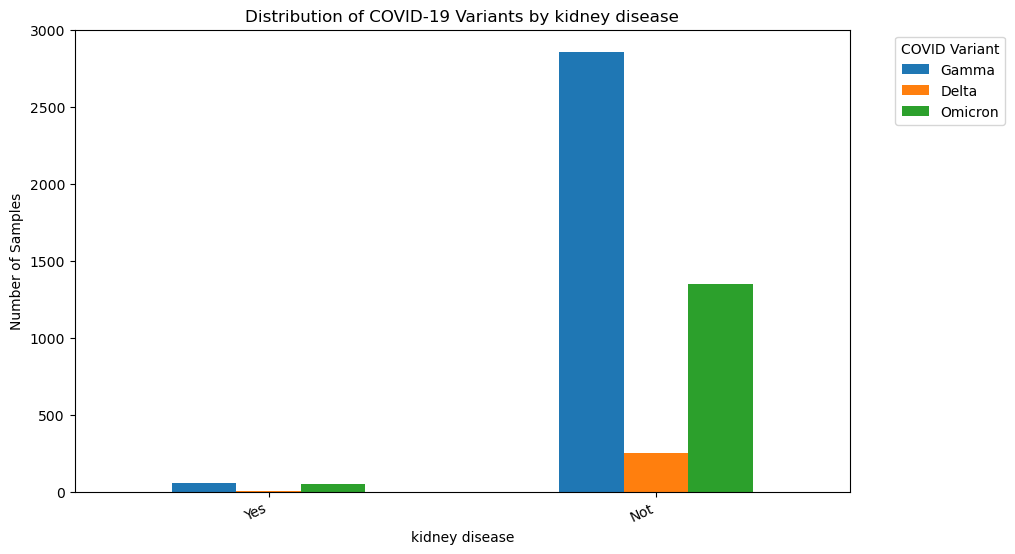

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,57,1.96%,4,1.57%,53,3.77%,114
Not,2858,98.04%,250,98.43%,1351,96.23%,4459
Total,2915,100.0%,254,100.0%,1404,100.0%,4573


H₀: The two categorical variables have no relationship
p-value : 0.007827758232712645

Null Hypothesis is rejected.


In [43]:
labels = FAIXA_PADRAO

# Create a DataFrame for plotting
plot_df = pd.DataFrame(index=labels)

# Count the number of people for each variant by Chronic cardiovascular disease
for variant in df['VARIANTE_COVID'].unique():
    variant_counts = df[df['VARIANTE_COVID'] == variant].loc[df['RENAL'] != 'Ignored'].groupby('RENAL').size()
    plot_df[variant] = variant_counts

plot_df.rename(columns={1: 'Gamma', 2: 'Delta', 3: 'Omicron'}, inplace=True)

# Plot the grouped bar chart
ax = plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Variants by kidney disease')
plt.xlabel('kidney disease')
plt.ylabel('Number of Samples')
plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.show()

# Add 'Total' column
plot_df['Total'] = plot_df.sum(axis=1)

# Add 'Total' row
plot_df.loc['Total'] = plot_df.sum()

percentage_df = plot_df.copy()
# Add percentage columns
for variant in ['Gamma', 'Delta', 'Omicron']:
    percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
percentage_df = percentage_df[column_order]
display(percentage_df)

alpha = 0.05
chi_square = 0
columns = plot_df.iloc[:,0:3].columns
rows = plot_df.iloc[0:3].index
for i in columns:
  for j in rows:
    O = plot_df[i][j] #observed value
    E = plot_df[i]['Total'] *plot_df['Total'][j] / plot_df['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E


p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

relationship between asthma and covid variants

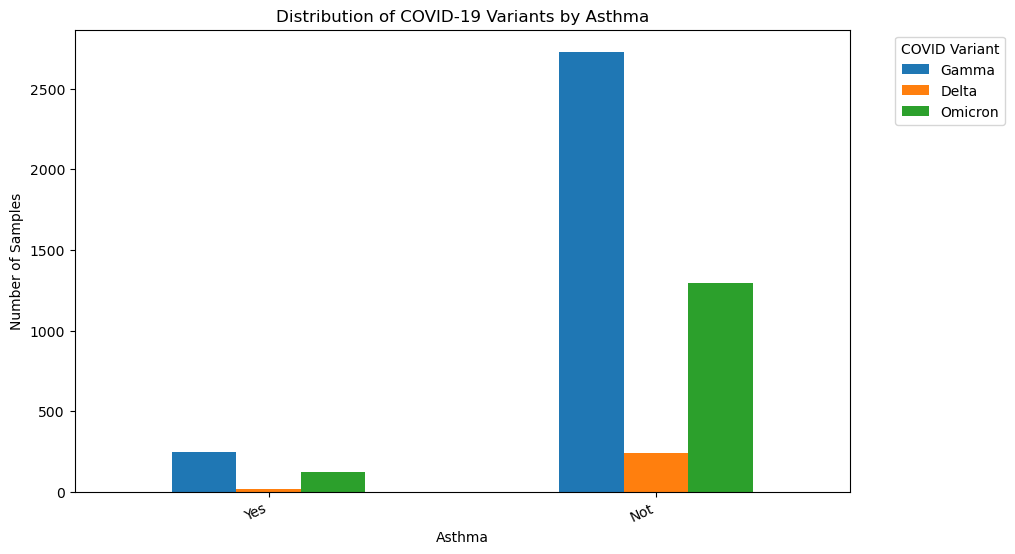

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,244,8.21%,20,7.63%,121,8.56%,385
Not,2729,91.79%,242,92.37%,1293,91.44%,4264
Total,2973,100.0%,262,100.0%,1414,100.0%,4649


H₀: The two categorical variables have no relationship
p-value : 0.9892919096900227

Failed to reject the null hypothesis.


In [47]:
labels = FAIXA_PADRAO

# Create a DataFrame for plotting
plot_df = pd.DataFrame(index=labels)

# Count the number of people for each variant by Asthma
for variant in df['VARIANTE_COVID'].unique():
    variant_counts = df[df['VARIANTE_COVID'] == variant].loc[df['ASMA'] != 'Ignored'].groupby('ASMA').size()
    plot_df[variant] = variant_counts

plot_df.rename(columns={1: 'Gamma', 2: 'Delta', 3: 'Omicron'}, inplace=True)

# Plot the grouped bar chart
ax = plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Variants by Asthma')
plt.xlabel('Asthma')
plt.ylabel('Number of Samples')
plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.show()

# Add 'Total' column
plot_df['Total'] = plot_df.sum(axis=1)

# Add 'Total' row
plot_df.loc['Total'] = plot_df.sum()

percentage_df = plot_df.copy()
# Add percentage columns
for variant in ['Gamma', 'Delta', 'Omicron']:
    percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
percentage_df = percentage_df[column_order]
display(percentage_df)

alpha = 0.05
chi_square = 0
columns = plot_df.iloc[:,0:3].columns
rows = plot_df.iloc[0:3].index
for i in columns:
  for j in rows:
    O = plot_df[i][j] #observed value
    E = plot_df[i]['Total'] *plot_df['Total'][j] / plot_df['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E


p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

relationship between diabetes mellitus and covid variant

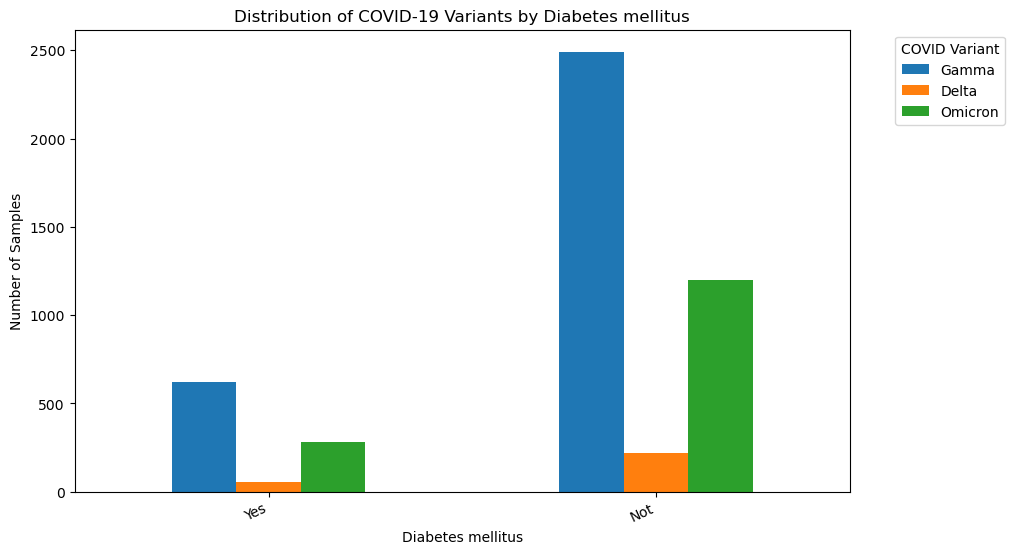

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,619,19.9%,56,20.36%,282,19.02%,957
Not,2492,80.1%,219,79.64%,1201,80.98%,3912
Total,3111,100.0%,275,100.0%,1483,100.0%,4869


H₀: The two categorical variables have no relationship
p-value : 0.9644979128949225

Failed to reject the null hypothesis.


In [48]:
labels = FAIXA_PADRAO

# Create a DataFrame for plotting
plot_df = pd.DataFrame(index=labels)

# Count the number of people for each variant by Diabetes mellitus
for variant in df['VARIANTE_COVID'].unique():
    variant_counts = df[df['VARIANTE_COVID'] == variant].loc[df['DIABETES'] != 'Ignored'].groupby('DIABETES').size()
    plot_df[variant] = variant_counts

plot_df.rename(columns={1: 'Gamma', 2: 'Delta', 3: 'Omicron'}, inplace=True)

# Plot the grouped bar chart
ax = plot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Variants by Diabetes mellitus')
plt.xlabel('Diabetes mellitus')
plt.ylabel('Number of Samples')
plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
plt.show()

# Add 'Total' column
plot_df['Total'] = plot_df.sum(axis=1)

# Add 'Total' row
plot_df.loc['Total'] = plot_df.sum()

percentage_df = plot_df.copy()
# Add percentage columns
for variant in ['Gamma', 'Delta', 'Omicron']:
    percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
percentage_df = percentage_df[column_order]
display(percentage_df)

alpha = 0.05
chi_square = 0
columns = plot_df.iloc[:,0:3].columns
rows = plot_df.iloc[0:3].index
for i in columns:
  for j in rows:
    O = plot_df[i][j] #observed value
    E = plot_df[i]['Total'] *plot_df['Total'][j] / plot_df['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E


p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

relationship between other underline medical conditions and covid variant

In [ ]:
'''
df['OUT_MORBI']
df['HEMATOLOGI']
df['SIND_DOWN']
df['HEPATICA']
df['NEUROLOGIC']
df['PNEUMOPATI']
df['IMUNODEPRE']
df['OBESIDADE']
'''

Tabela 1: Características sociodemográficas e obstétricas de mulheres com infecção por SARS-CoV-2 confirmada laboratorialmente.

*Notes*


* The dataset does not contain information on parity

* The dataset does not contain information on marital status

* The df['VACINA_COV'] column does not contain the relation: complete vaccination : 1, and incomplete vaccination : 2 , but rather the relation: at least 1 dose : 1 , and no dose :2 . Thus, to determine whether the vaccination was complete (2 doses or more), we need to look at the dates of the doses, but these variables have many NaNs

